In [15]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.feature_extraction.text import CountVectorizer

# Retrieve Data from txt file 

In [16]:
data = open("/home/sangram/AdvancedPython/cluster.txt").read().split('\n')

# Vectorize sentences from data to 2D matrix

Use `CountVectorizer()` function from `scikit-learn` package

In [17]:
count_vect = CountVectorizer(max_df=0.9,min_df=25,analyzer='word',stop_words='english') #Scikit-learn function to vectorize using Counts of words
count_matrix = count_vect.fit_transform(data)

# Pre Processing data 

In [18]:
# convert to Numpy array
numpy_matrix = count_matrix.toarray()
# Remove the row containing all zero 
numpy_matrix1 = numpy_matrix[~np.all(numpy_matrix == 0, axis = 1)]

# Apply Agglomerative clustering 

Using `single` linkage and `cosine` similarity metric

In [72]:
Z = linkage(numpy_matrix1,method='single',metric='cosine',optimal_ordering=False)

# Plot Dendograms from clusters

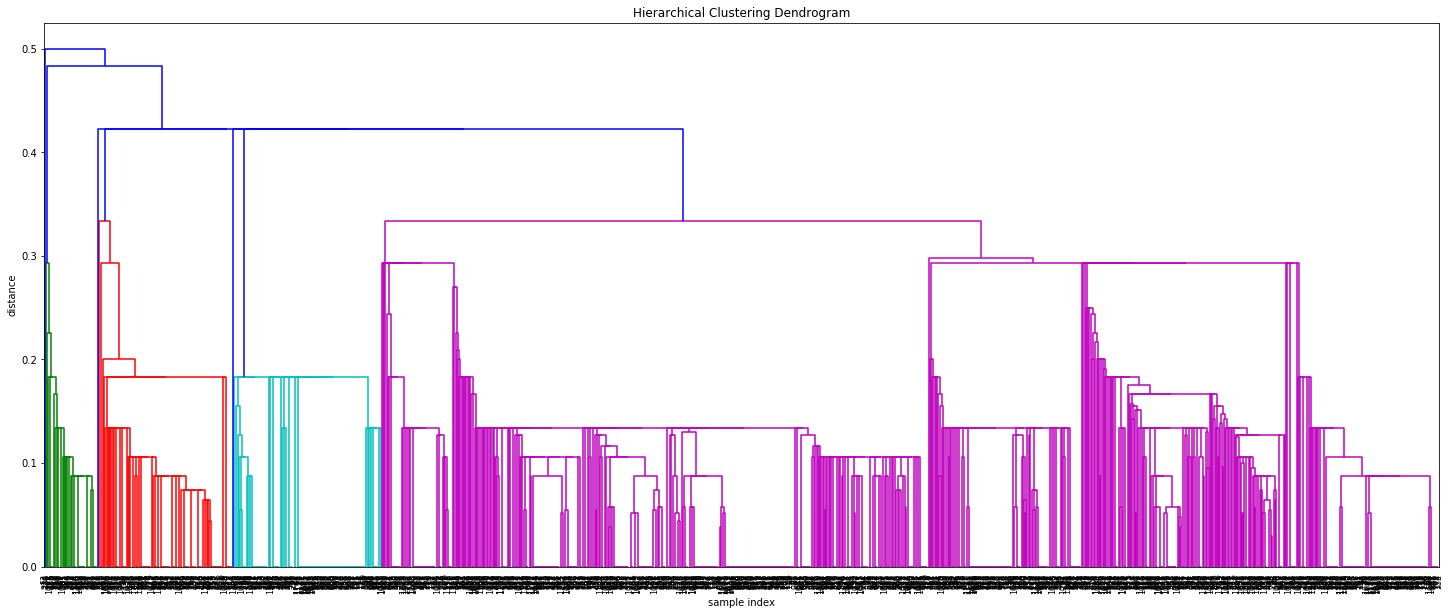

In [140]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
fig1 = plt.gcf()
plt.show()
# plt.draw()
fig1.savefig('full_dendogram_Single_Linkage.png',dpi=100)

# Truncate Dendograms to find optimal number of clusters


In [75]:
def plot_truncated_dendograms(n_clusters):
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    plt.axhline(y=0.25, color='k', linestyle='-') #Plot horizontal cut off line
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=n_clusters,  # show only the last p merged clusters
        show_leaf_counts=False,  # otherwise numbers in brackets are counts
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
        
    )
    plt.show()

# Non Interactive Dendograms

Truncated at last **28 clusters** and inter-cluster distance = **0.25**

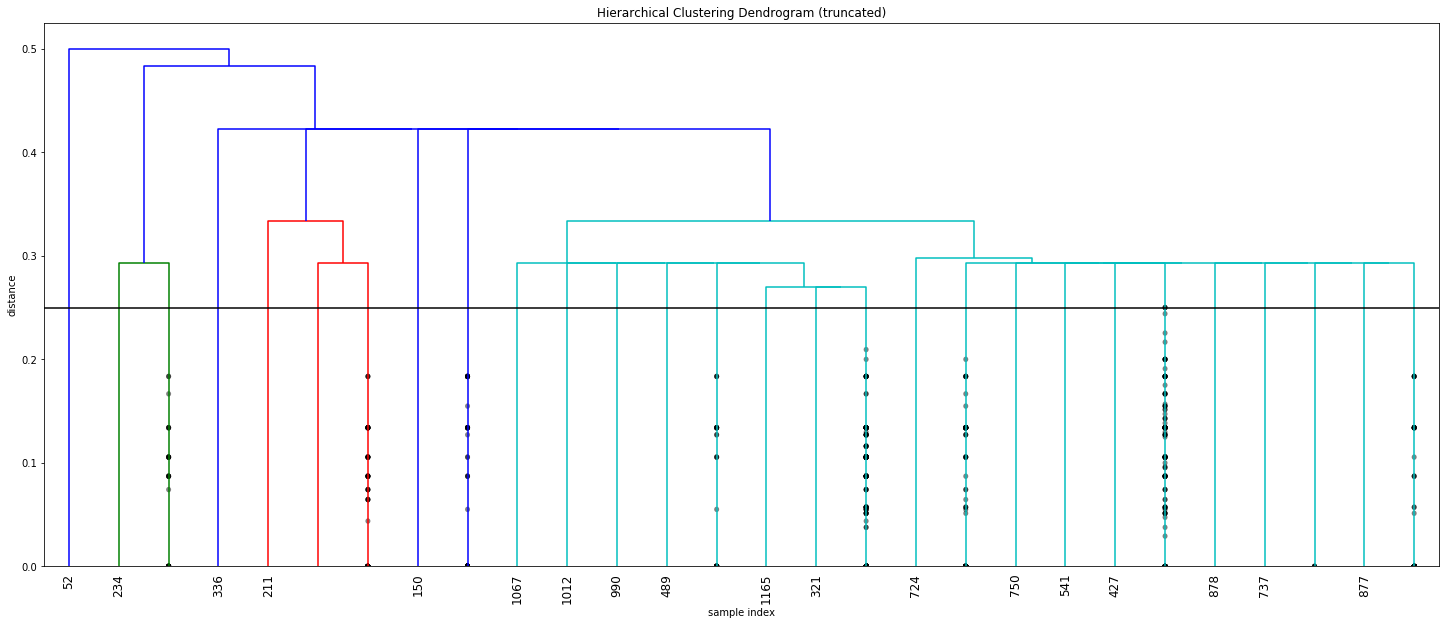

In [86]:
plot_truncated_dendograms(n_clusters=28)


# Pretty Dendogram

In [92]:
def augmented_dendrogram(*args, **kwargs):
    plt.figure(figsize=(25, 10))
    plt.xlabel('sample index')
    plt.ylabel('distance')
    plt.title('Hierarchical Clustering Dendrogram (Truncated)')
    plt.axhline(y=0.25, color='k', linestyle='-') #Plot horizontal cut off line
    ddata = dendrogram(*args, **kwargs)
    # Plot cluster points
    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
           
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')
    return ddata

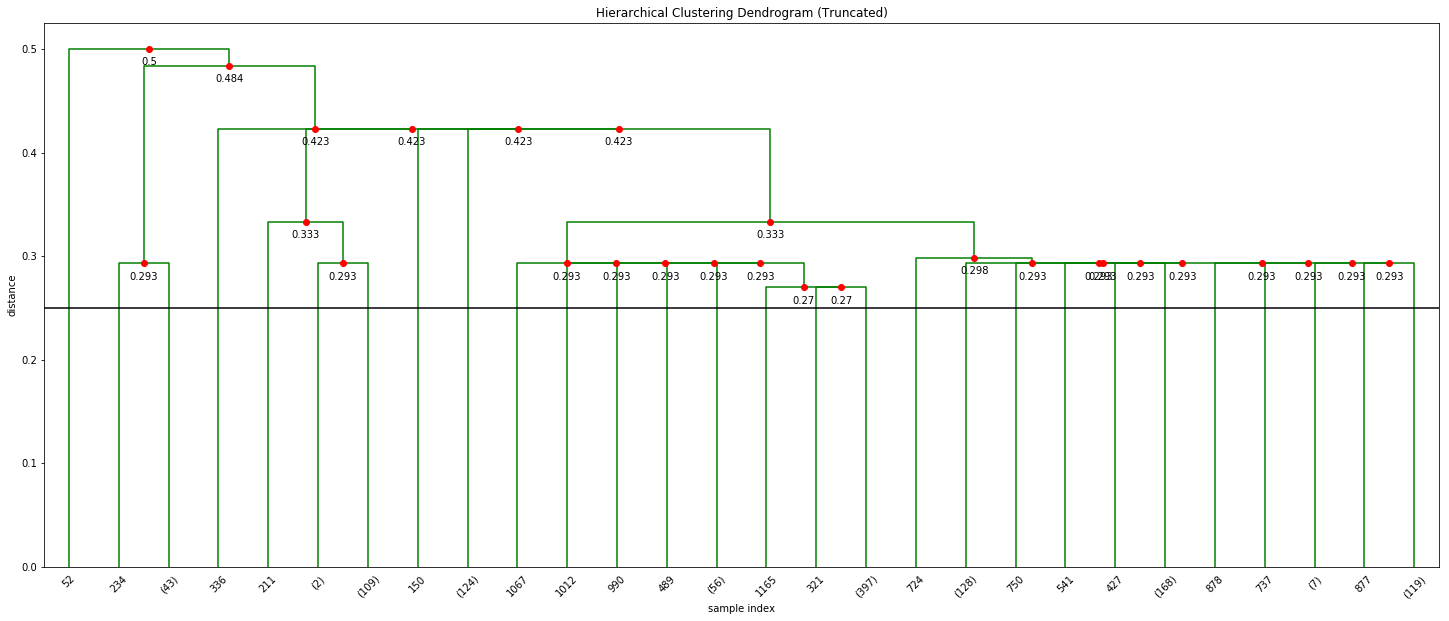

In [98]:
ddata = augmented_dendrogram(Z,
                   color_threshold=1,
                   p=28,
                   truncate_mode='lastp',
                   )

fig1 = plt.gcf()
plt.show()
# plt.draw()
fig1.savefig('truncated_dendogram_fancy.png', dpi=100)

# Interactive Plots

Tip: If you cannot see the output then, download the notebook and run it in your local machine.  
Or     
Upload the notebook to [try.jupyter.org](https://try.jupyter.org/)

In [76]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interactive_plot = interactive( plot_truncated_dendograms, n_clusters=(20,60,1))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=40, description='n_clusters', max=60, min=20), Output()), _dom_classes=('widget-interact',))

# Pretty and Interactive Dendograms

In [77]:
def augmented_dendrogram(*args, **kwargs):
    plt.figure(figsize=(25, 10))
    plt.xlabel('sample index')
    plt.ylabel('distance')
    plt.title('Hierarchical Clustering Dendrogram (Truncated)')
    plt.axhline(y=0.25, color='k', linestyle='-') #Plot horizontal cut off line
    ddata = dendrogram(*args, **kwargs)
    # Plot cluster points
    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
           
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

In [78]:
def interactive_and_augmented_dendogram(n_clusters):
    ddata = augmented_dendrogram(Z,
                   color_threshold=1,
                   p=n_clusters,
                   truncate_mode='lastp',
                   )

    plt.show()

# You need ipywidgets for interactivity
interactive_plot = interactive(interactive_and_augmented_dendogram, n_clusters=(20,40,1))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=30, description='n_clusters', max=40, min=20), Output()), _dom_classes=('widget-interact',))


# Retrieve the Clusters

Now, let's finally have a look at how to retrieve the clusters, for different ways of determining k. We can use the fcluster function.

[More about fcluster function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)

# Knowing max_d:

Let's say we determined the max distance with help of a dendrogram, then we can do the following to get the cluster id for each of our samples:


In [143]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.25
clusters = fcluster(Z, max_d, criterion='distance')
np.unique(clusters)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int32)

# Silhouette score

The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves. Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.  


The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.  


**The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.**

[More About Silhouette Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html)

In [131]:
n_clusters = 28
clusters2 = fcluster(Z, n_clusters , criterion='maxclust')
np.unique(clusters2)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int32)

In [132]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.spatial.distance import pdist

silhouette_score(numpy_matrix1 , clusters2, metric='cosine')

0.16717357151444368

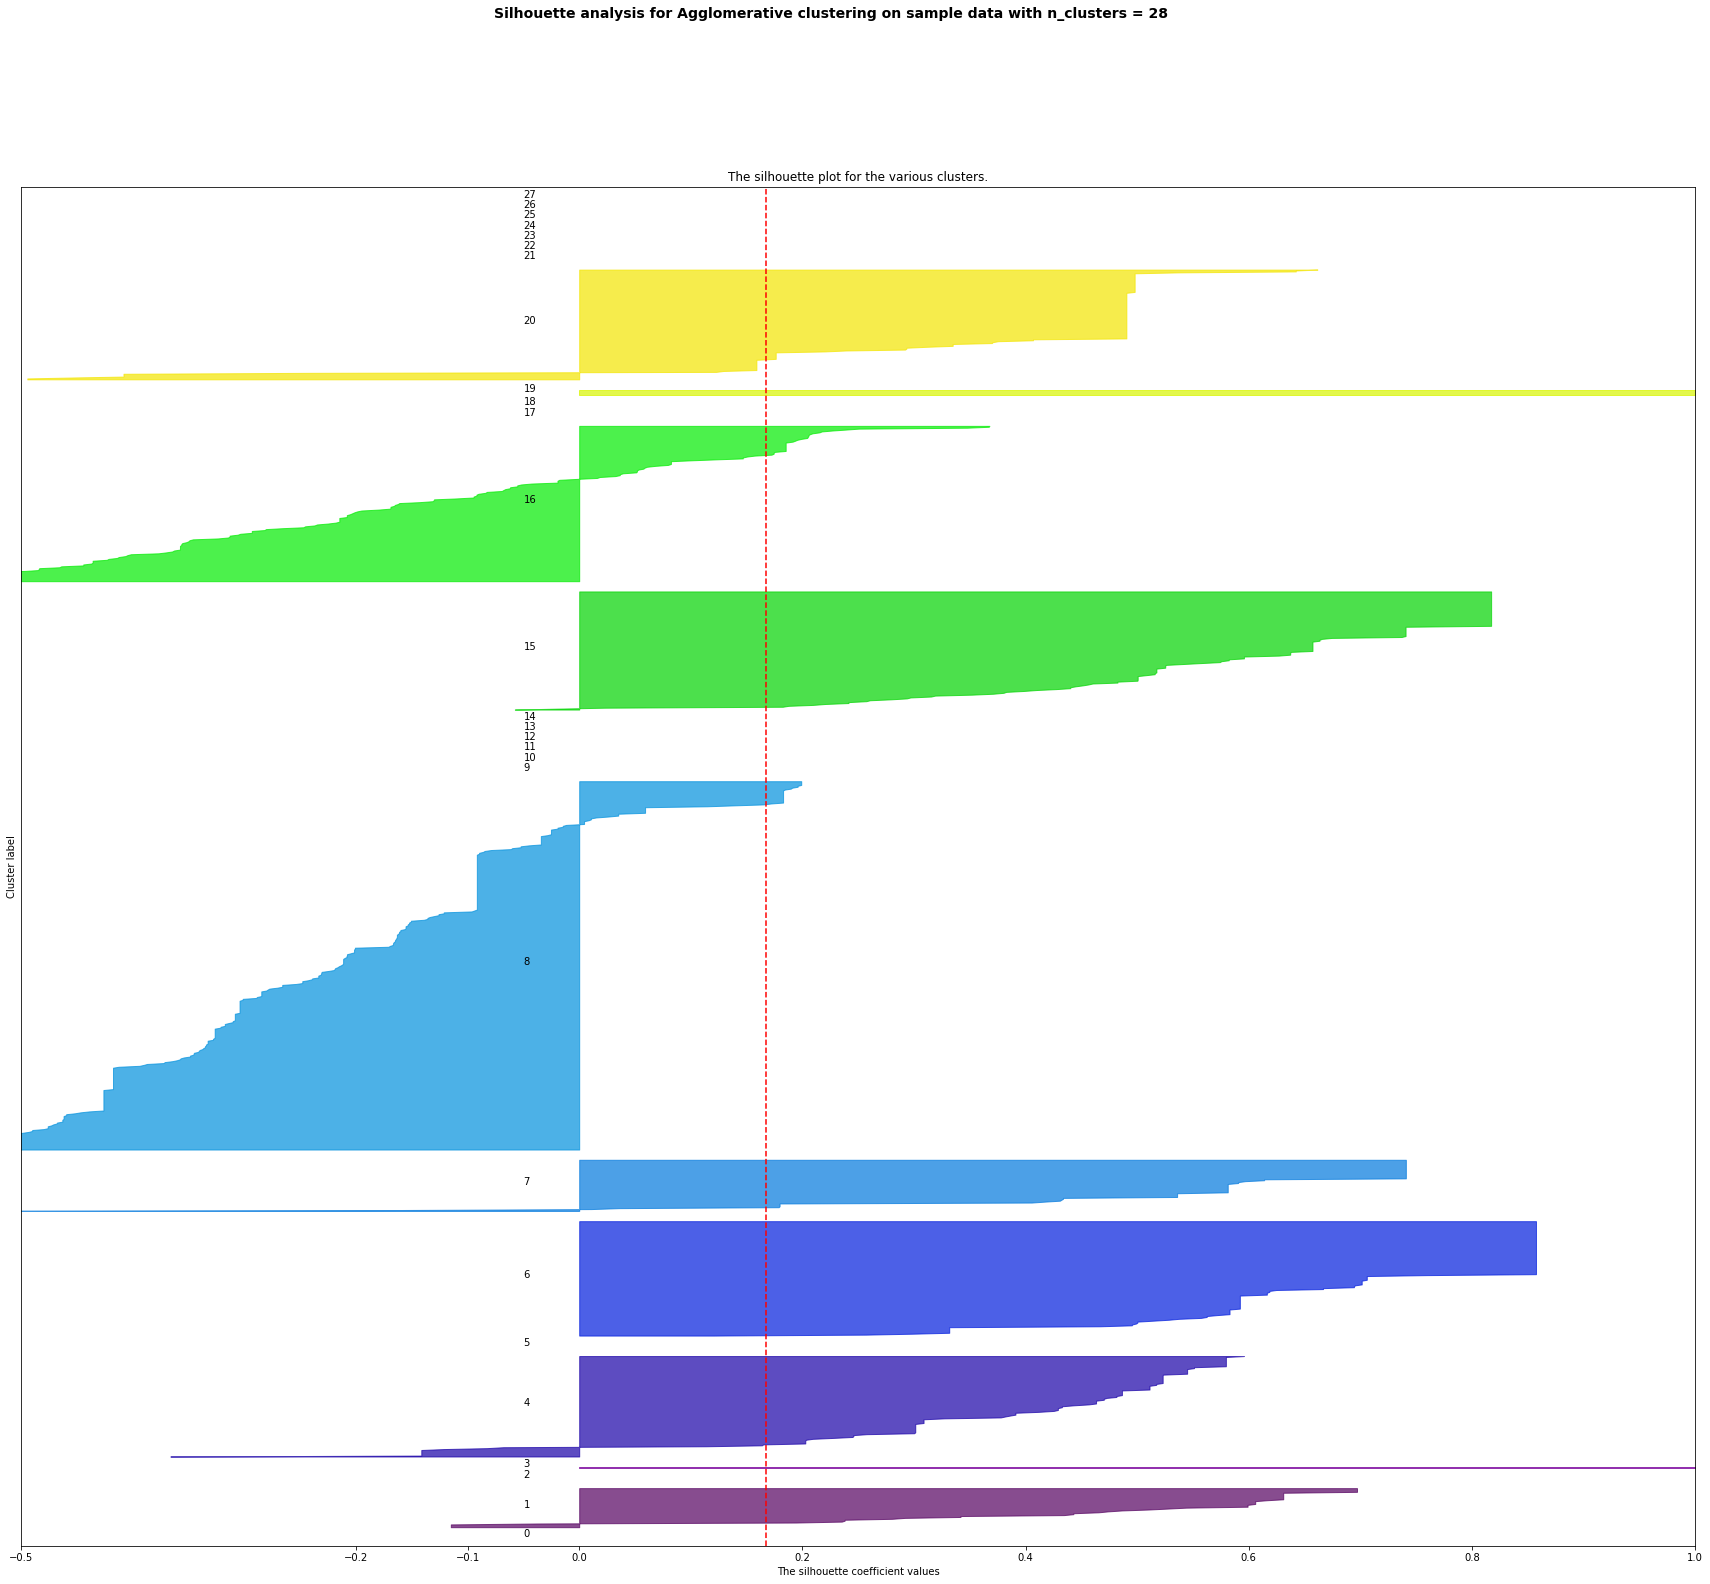

In [141]:
clusters2 = fcluster(Z, n_clusters , criterion='maxclust')
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(numpy_matrix1 , clusters2, metric='cosine')
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(numpy_matrix1, clusters2,metric='cosine')

#np.unique(clusters2)

fig, ax = plt.subplots(figsize=(30, 25)) # set size
#fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax.set_xlim([-0.5, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax.set_ylim([0, numpy_matrix1.shape[0] + (n_clusters + 1) * 10])

    


#print(sample_silhouette_values)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clusters2 == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.5,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', lw=0, 
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

fig1 = plt.gcf()
plt.show()
fig1.savefig('Sillhoute_analysis_n_28.png', dpi=100)


# Cophenet clustering criteria
This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances

[More about Cophenet](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html)  


[Cophenet Correlation coefficient](https://en.wikipedia.org/wiki/Cophenetic_correlation)

In [137]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(Z, pdist(numpy_matrix1))
c

0.50052118884872687